In [1]:
#importing all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
%matplotlib inline

In [5]:
#loading dataset primarily in the name 'df'

df = pd.read_csv('loan.csv')
pd.set_option('display.max_columns', 35)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Cleaning dataset & Sanity Check

df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]) if x[-1]=='%' else None)

df['revol_util'] = df['revol_util'].str.replace('%', '')
df['revol_util']= df['revol_util'].astype('float64')

df['term'] = df['term'].str.replace('months', '')
df['term'] = df['term'].astype('int32')

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
#no. of bankruptcy is an ordered categorical data and since in this dataset majority have zero record of bankruptcies, so its good to use mode value to impute missing values.

df['emp_length'] = df['emp_length'].str.replace('< 1 year', '1 year')


df = df[(df.loan_status != 'Current')] #as per Reena Duggal ma'am's advice, dropping records of those with loan_status 'Current' 
df = df[~((df.emp_length.isnull()) | (df.last_pymnt_d.isnull()) | (df.revol_util.isnull()))]

In [7]:

#fixing datatype of loan issuing date and last payment date; and also taking their difference as a variable
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = df['issue_d'].dt.month #Derived Metrics
df['issue_year'] = df['issue_d'].dt.year #Derived Metrics

df['charged_off'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0}) #Derived Metrics
df['home_ownership'] = df['home_ownership'].str.replace('NONE', 'OTHER') 

In [8]:
# Variables we will consider to begin our analysis  

data = df[['id','addr_state','grade','sub_grade','loan_amnt', 'funded_amnt_inv', 'int_rate', 'term','installment','loan_status','charged_off', 'purpose','annual_inc','verification_status' , 'dti', 'emp_length', 'home_ownership','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries', 'issue_year', 'issue_month']]
data.reset_index()
data.head(4) 


,id,addr_state,grade,sub_grade,loan_amnt,funded_amnt_inv,int_rate,term,installment,loan_status,charged_off,purpose,annual_inc,verification_status,dti,emp_length,home_ownership,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,issue_year,issue_month
0,1077501,AZ,B,B2,5000,4975.0,10.65,36,162.87,Fully Paid,0,credit_card,24000.0,Verified,27.65,10+ years,RENT,5833.84,5000.00,863.16,0.00,0.00,2011,12
1,1077430,GA,C,C4,2500,2500.0,15.27,60,59.83,Charged Off,1,car,30000.0,Source Verified,1.00,1 year,RENT,1008.71,456.46,435.17,0.00,117.08,2011,12
2,1077175,IL,C,C5,2400,2400.0,15.96,36,84.33,Fully Paid,0,small_business,12252.0,Not Verified,8.72,10+ years,RENT,3005.67,2400.00,605.67,0.00,0.00,2011,12
3,1076863,CA,C,C1,10000,10000.0,13.49,36,339.31,Fully Paid,0,other,49200.0,Source Verified,20.00,10+ years,RENT,12231.89,10000.00,2214.92,16.97,0.00,2011,12


### Explaining the data

Loan id 1077501 is of B grade had applied for USD 5000 loan and has been funded USD 5000 against 10.65% interest rate over an agreement of term 36 months with installments to be paid USD 162.87 each month. With No remaining outstanding principal, Full payment is ensured.
The borrower has an annual income of USD 24000 (verified) with employment length over 10 years lives in rented residence. The purpose of the loan was to pay for credit card. The borrower has dti 27.65.

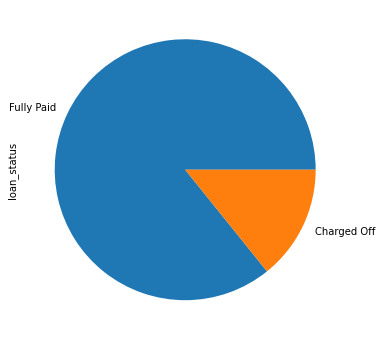

In [9]:
plt.subplots(figsize=(8,6))
data.loan_status.value_counts().plot.pie()
plt.show()

In [10]:

charged_off = data[(data['loan_status'] == 'Charged Off')]
fully_paid = data[(data['loan_status'] == 'Fully Paid')]

round(100*len(charged_off)/len(fully_paid),3)

16.573

16.573% of past customer data is of loan status 'Charged Off'

# Annual Income Analysis

In [48]:
data['annual_inc'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       4000.0
0.25      41000.0
0.50      60000.0
0.75      83000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

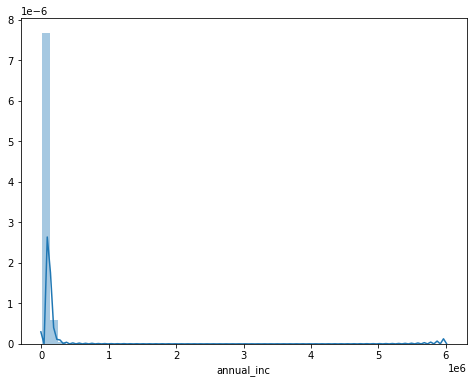

In [49]:
#Univariate Analysis

plt.subplots(figsize=(8,6))
sns.distplot(data['annual_inc'])
plt.show()

We found that the dataset has outliers on the upper bound. So we will be taking data less than or equal to 95th percentile.

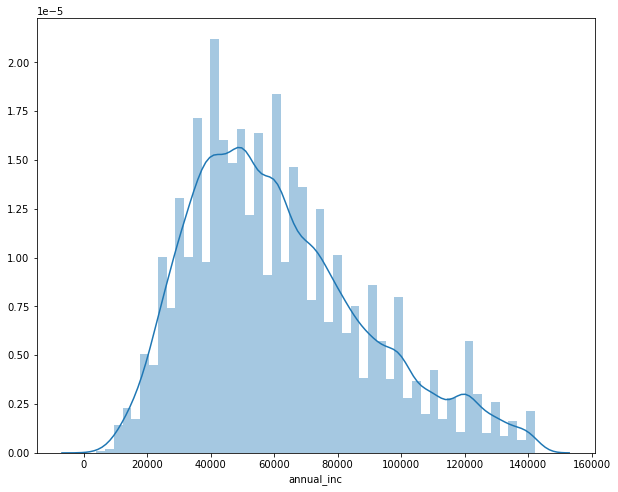

In [50]:
data = data[(data['annual_inc'].values) <= (data['annual_inc'].quantile(0.95))]

plt.subplots(figsize=(10,8))
sns.distplot(data['annual_inc'])
plt.show()

Now we can see that the annual income feature forms normal distribution, this shall help us develop better Esplanatory Data Analysis.

In [51]:
#Binning income
income_group = ['low_income', 'mid_range_income', 'high_income']
income_bins = [4000, 46000, 92000, 143000 ]

data['income_range'] = pd.cut(data['annual_inc'], income_bins, labels= income_group)


### Annual Income vs Home Ownership

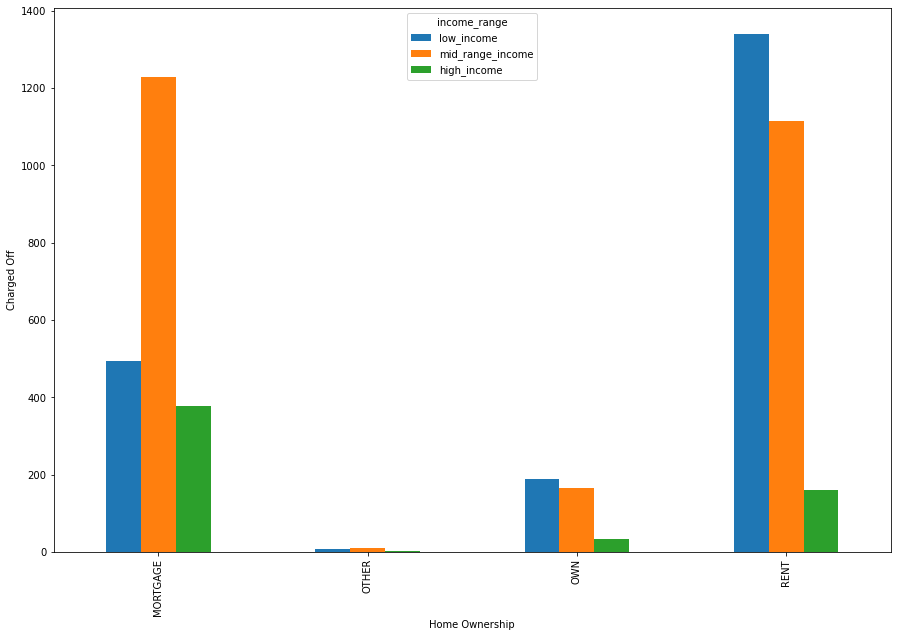

In [52]:
#bivariate analysis
pd.pivot_table(data= data, columns= 'income_range', values='charged_off', index='home_ownership', aggfunc= 'sum').plot(kind="bar",figsize=[15,10])
plt.xlabel('Home Ownership')
plt.ylabel('Charged Off')
plt.show() #Note: The values in the vertical axis of the graph is total number of “Charged-Off” cases.


INSIGHT: Here we see that customers who own their home has very low tendency to default especially the ones who are in high income group. 
Customers who pays rent for their residence, are very likely to default especially the mid range income earners, followed by low income earners.

Customers who has mortgage, among them the mid range income earners are most likely to default.

### Annual Income vs Address State

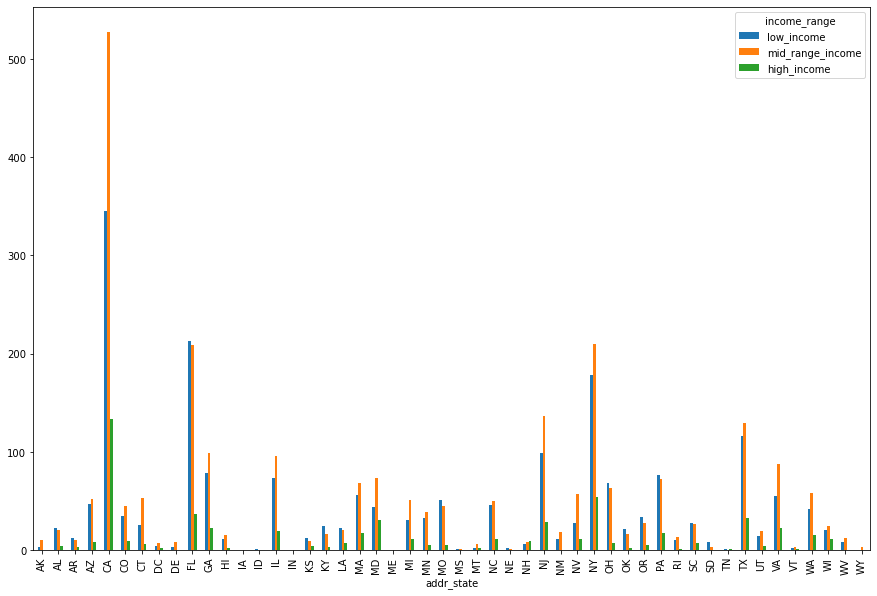

In [53]:
pd.pivot_table(data= data, columns= 'income_range', values='charged_off', index='addr_state', aggfunc= 'sum').plot(kind="bar", figsize=[15,10])
plt.show()

#Note: The values in the vertical axis of the graph is total number of “Charged-Off” cases.

Insight:
We see that population from mid range income basket yields most charged off cases; moreover, California, New York, Florida, Texas being top 4 states with very high charged off cases. 


Recommendation: LC can configure different measures upon different states to minimize the frequency.

# Default Rate Analysis

### Loan Sub Grade vs Loan Sub Grade

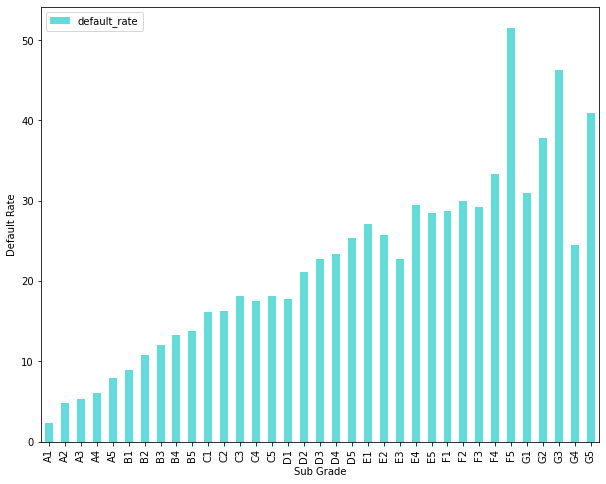

In [54]:
def_data = data.groupby('sub_grade')['charged_off'].agg(['sum', 'count'])
def_data['default_rate'] = round(100*def_data['sum']/def_data['count'], 2)


def_data[['default_rate']].plot.bar(figsize=(10,8), color='#64dbdb')
plt.ylabel('Default Rate')
plt.xlabel('Sub Grade')
plt.show()

Insight: Sub grades F5, G2, G3, G5 have high default rate.

Recommendation: Since they these sub grade reflects risky loan so LC management can consider limiting loan amount or devise policies that can make borrower of these sub grades subject to meeting conditions in order to sanction the loan.  


## Address State vs Default Rate

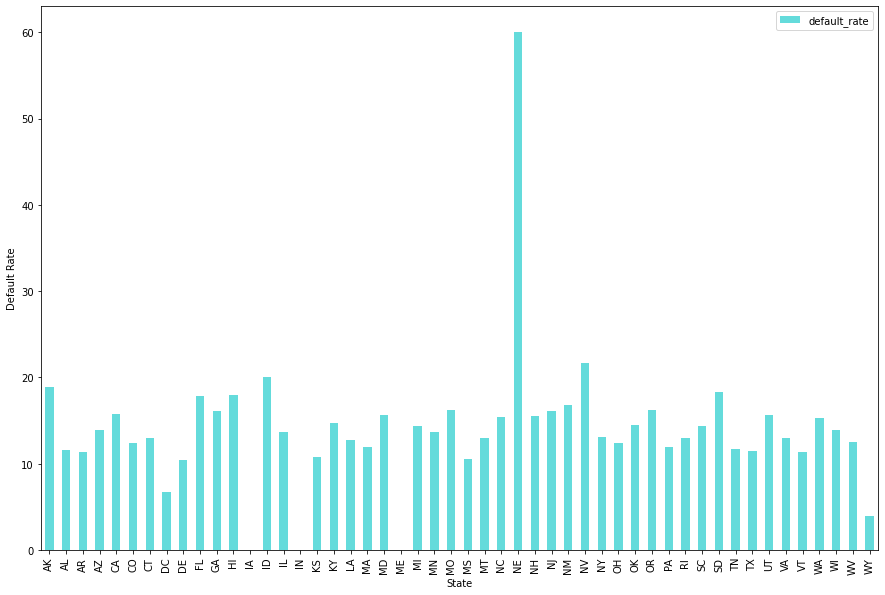

In [55]:
def_data = data.groupby('addr_state')['charged_off'].agg(['sum', 'count'])
def_data['default_rate'] = round(100*def_data['sum']/def_data['count'], 2)


def_data[['default_rate']].plot.bar(figsize=(15,10),color='#64dbdb')
plt.ylabel('Default Rate')
plt.xlabel('State')
plt.show()

Insight: Nebraska (NE) has quite a significant rate of default cases.

Recommendation: LC can first analyze why borrower from Nebraska has such high tendency to default then formulate credit constraint measures. 


## Purpose vs Default Rate

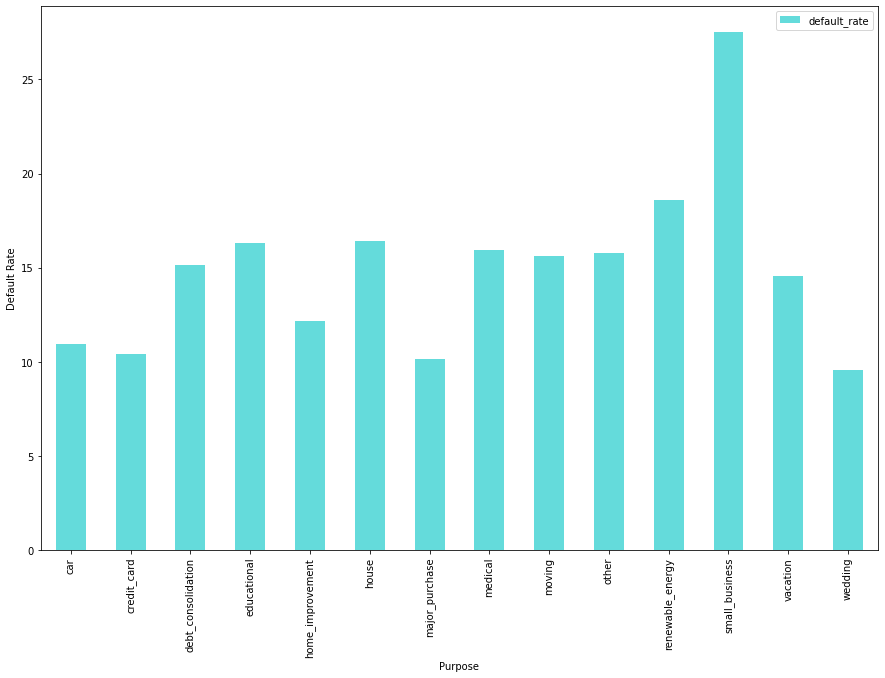

In [56]:
def_data = data.groupby('purpose')['charged_off'].agg(['sum', 'count'])
def_data['default_rate'] = round(100*def_data['sum']/def_data['count'], 2)


def_data[['default_rate']].plot.bar(figsize=(15,10),color='#64dbdb')
plt.ylabel('Default Rate')
plt.xlabel('Purpose')
plt.show()

Insight: Borrowers for ‘Small Business’ purpose are most likely to default.

Recommendation: LC can consider taking soft measures to potential entrepreneurs of small business or startups
depending on borrowers’ plan to utilize the credit and repay. 


# Interest rate analysis

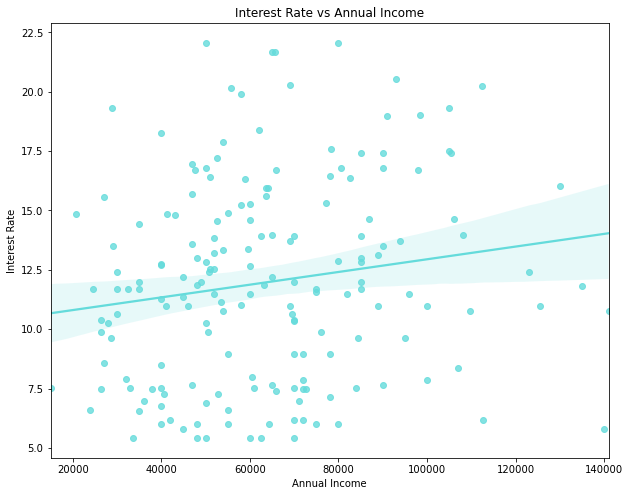

In [57]:
#bivariate analysis
int_inc_plot = data.sample(frac=0.005,random_state=1)

plt.figure(figsize=(10,8))
ax = sns.regplot(x="annual_inc", y="int_rate", data=int_inc_plot,color='#64dbdb')
ax = plt.xlabel('Annual Income')
ax = plt.ylabel('Interest Rate')
ax = plt.title('Interest Rate vs Annual Income')

There seems to have slight positive relation between interest rate and annual income. Suspecion: high income earners are expected to good loan customer and often charged reasonable rates unless they have tough credit record issues. So we can understand that majority of large loans are being taken by groups having lower grade (evidence shown below).

In [70]:
#large loans are being taken by groups having lower grade 
data[(data.funded_amnt_inv.values > data.funded_amnt_inv.quantile(0.99))]['grade'].value_counts()

E    78
B    76
C    62
D    56
F    37
A    30
G    17
Name: grade, dtype: int64

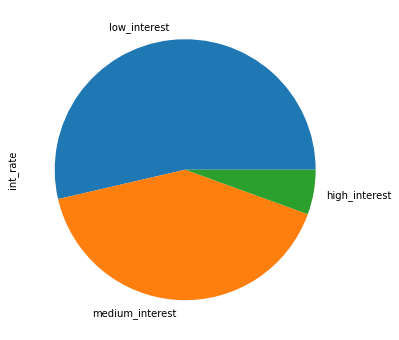

In [69]:
#Derived Metrics (extracting new feature out of existing feature 'int_rate')
#Binning Interest rates

group_names = ['low_interest', 'medium_interest' ,'high_interest']
bins = [5, 12, 18, 25]
data['interest_range'] = pd.cut(data['int_rate'], bins, labels=group_names)

plt.subplots(figsize=(8,6))
data.groupby('interest_range')['int_rate'].count().plot.pie()

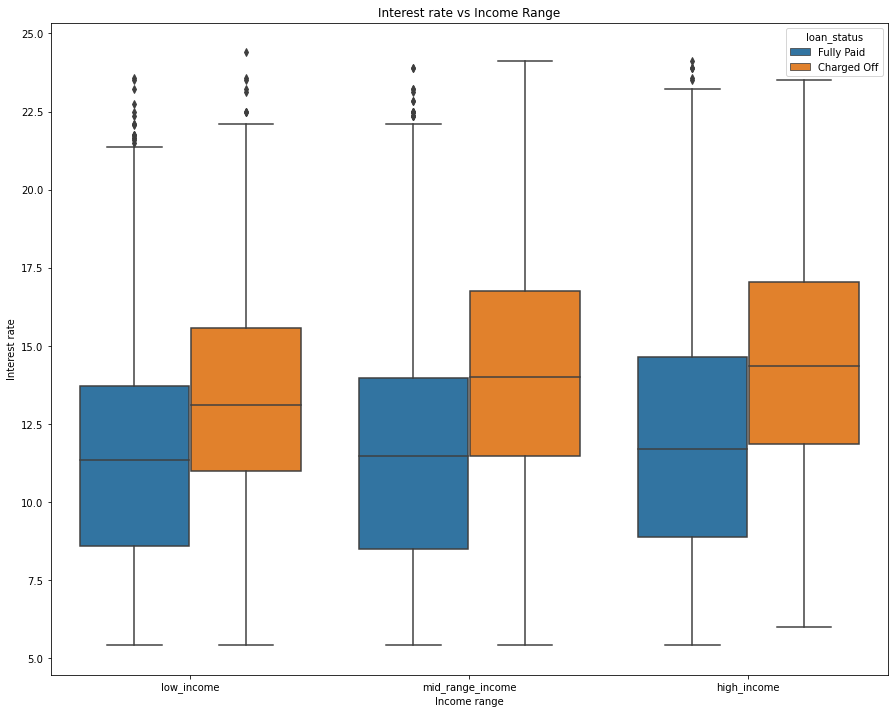

In [60]:
#bivariate analysis

plt.figure(figsize=(15,12))
sns.boxplot(data =data, x='income_range', y='int_rate', hue ='loan_status')
plt.title('Interest rate vs Income Range')
plt.xlabel('Income range')
plt.ylabel('Interest rate')
plt.show()

Insight: In both ‘high income’ and ‘mid range income’ basket, the median interest rate borne by charged-off group is equivalent to the upper limit (75th percentile) interest rate borne by the group ‘fully-paid’

Recommendation: LC can decide upon flexing interest rate to balance the weight upon different income groups in order to minimize default.


## Interest Rate vs Issue year

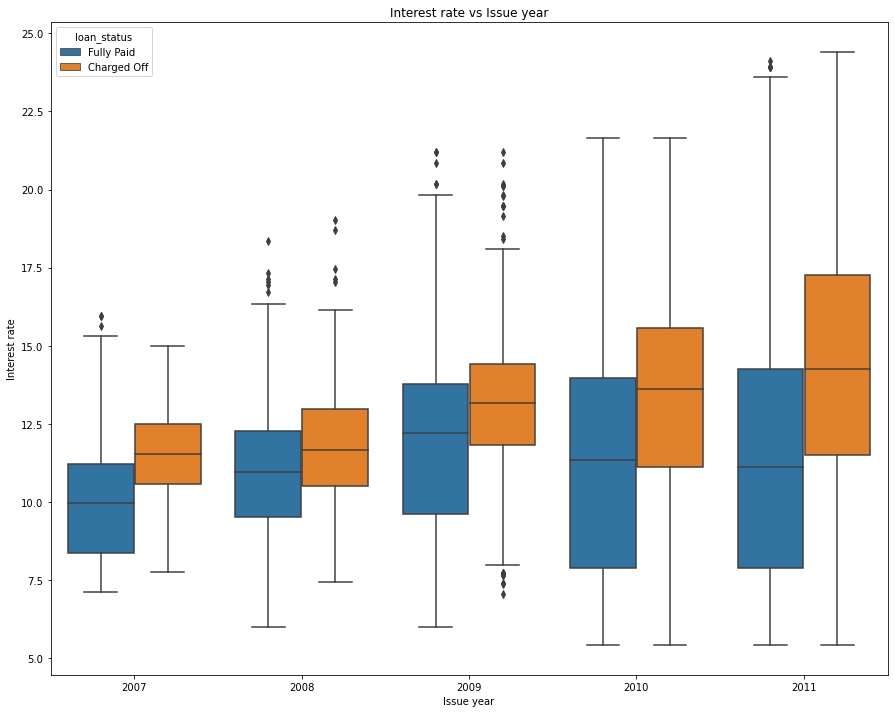

In [61]:

plt.figure(figsize=(15,12))
sns.boxplot(data =data, x='issue_year', y='int_rate', hue ='loan_status')
plt.title('Interest rate vs Issue year')
plt.xlabel('Issue year')
plt.ylabel('Interest rate')
plt.show()

Insight: The Charged-Off group has been experiencing higher median interest, this says interest is one major issue! The number of charge-off case increasing as well as their median interest rate.

Recommendation: LC can consider determining better calculation of interest rate

## Interest Rate vs Income & Loan Sub Grade

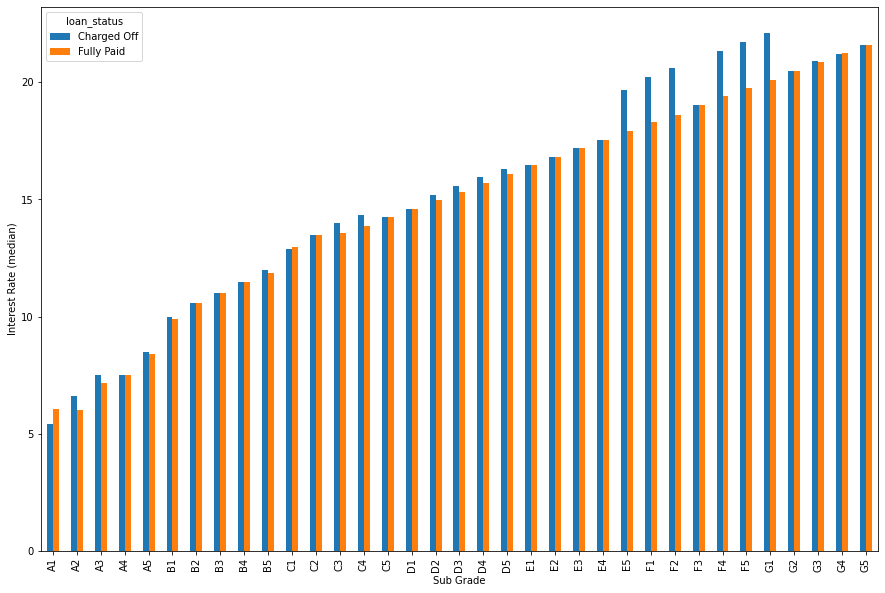

In [62]:
#bivariate analysis

data_int = pd.pivot_table(data= data, columns= 'loan_status', values='int_rate', index='sub_grade', aggfunc= 'median')
data_int.plot(kind="bar",figsize=[15,10])
plt.xlabel('Sub Grade')
plt.ylabel('Interest Rate (median)')
plt.show()

Insight: Notice that there are spikes in the median interest rate charged on the sub-grade D5, E5, F1, F2, F4, F5, G1.

Recommendation: LC can consider determining new range of interest rate to be charged on these loan sub grade.


# Sub Grade Analysis

#### Transforming lending Club's sub-grade to numeric value 'Score'


In [63]:

score_percentage = np.arange(0.3,1, 0.02)

sub_grade = ['G5', 'G4', 'G3', 'G2', 'G1','F5','F4', 'F3', 'F2', 'F1',
     'E5', 'E4', 'E3', 'E2', 'E1','D5', 'D4', 'D3', 'D2', 'D1',
     'C5','C4', 'C3', 'C2', 'C1','B5','B4', 'B3', 'B2', 'B1',
     'A5', 'A4', 'A3', 'A2', 'A1']

score_data = pd.DataFrame({'sub_grade': sub_grade,
                  'score': score_percentage})
data1 = pd.merge(data,score_data, on= 'sub_grade', how='left')
data1['score'] = data1['score']*100
data1['score'] = data1['score'].round()

data1.head(3) #data with score variable

,id,addr_state,grade,sub_grade,loan_amnt,funded_amnt_inv,int_rate,term,installment,loan_status,charged_off,purpose,annual_inc,verification_status,dti,emp_length,home_ownership,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,issue_year,issue_month,income_range,interest_range,score
0,1077501,AZ,B,B2,5000,4975.0,10.65,36,162.87,Fully Paid,0,credit_card,24000.0,Verified,27.65,10+ years,RENT,5833.84,5000.00,863.16,0.0,0.00,2011,12,low_income,low_interest,86.0
1,1077430,GA,C,C4,2500,2500.0,15.27,60,59.83,Charged Off,1,car,30000.0,Source Verified,1.00,1 year,RENT,1008.71,456.46,435.17,0.0,117.08,2011,12,low_income,medium_interest,72.0
2,1077175,IL,C,C5,2400,2400.0,15.96,36,84.33,Fully Paid,0,small_business,12252.0,Not Verified,8.72,10+ years,RENT,3005.67,2400.00,605.67,0.0,0.00,2011,12,low_income,medium_interest,70.0


Percentage Value assigned on sub-grade

A5-A1 --> 91-100

B5-B1 --> 81-90

C5-C1 --> 71-80

D5-D1 --> 61-70

E5-E1 --> 51-60

F5-F1 --> 41-50

G5-G1 --> 31-40

In [64]:
#Finding correlation
data_correl = data1[['loan_amnt','funded_amnt_inv','int_rate','annual_inc', 'dti', 'score']]
data_correl.corr()

,loan_amnt,funded_amnt_inv,int_rate,annual_inc,dti,score
loan_amnt,1.000000,0.935958,0.291048,0.397932,0.089437,-0.289120
funded_amnt_inv,0.935958,1.000000,0.289477,0.377559,0.096616,-0.265683
int_rate,0.291048,0.289477,1.000000,0.050378,0.114082,-0.960484
annual_inc,0.397932,0.377559,0.050378,1.000000,-0.078883,-0.060310
dti,0.089437,0.096616,0.114082,-0.078883,1.000000,-0.104836
score,-0.289120,-0.265683,-0.960484,-0.060310,-0.104836,1.000000


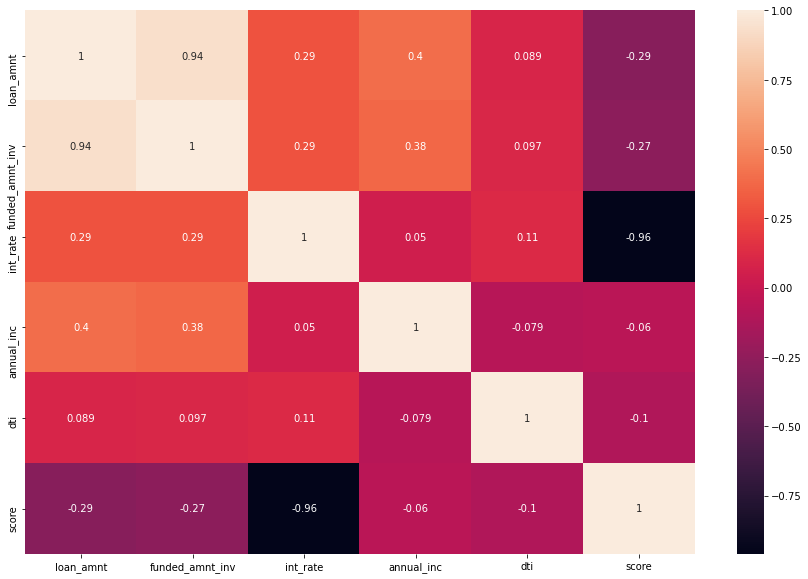

In [65]:
#bivariate analysis

data_correl = data1[['loan_amnt','funded_amnt_inv','int_rate','annual_inc', 'dti', 'score']]
correl = data_correl.corr()

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correl, xticklabels= correl.columns.values, yticklabels= correl.columns.values, annot=True)
plt.show()

Note: Scores are assigned between the range 30%-100% with variation of 2% for individual loan subgrades from G5 to A1.

Insight: Watching the strong negative correlation between score and interest rate, I can say that a person with a good score (i.e: good loan sub-grade) has a strong chance of obtaining very favorable interest rate. However we can not say that person is as likely to apply for large amount. 

Recommendation: This is where LC can shed focus and figure out opportunity of marketing their loan facilities to attract potential borrowers in order to improve this correlation in future.


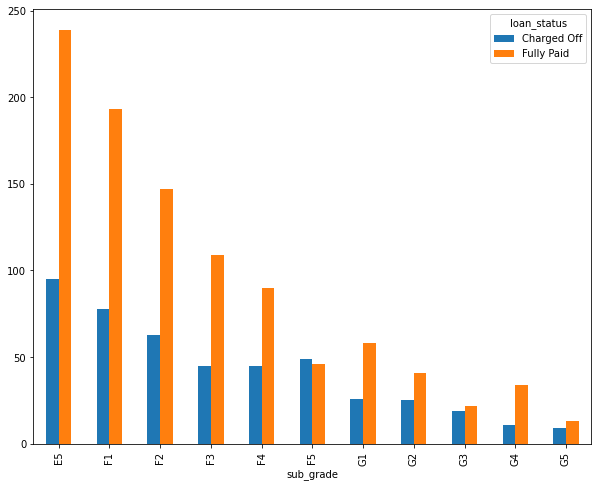

In [66]:
#Segmented univariate Analysis

risky_loan = data1[data1.score.values < data1.score.quantile(0.05)]
pd.pivot_table(data= risky_loan, columns= 'loan_status', values='score', index='sub_grade', aggfunc= 'count').plot(kind="bar", figsize=[10,8])
plt.show()

#Note the vertical value here is COUNT of the scores

In [67]:
risky_loan.loan_status.value_counts()

Fully Paid     992
Charged Off    465
Name: loan_status, dtype: int64

$NOTE:$ Below 5th percentile of score range, the $cost$ of 10 good customer is $loss$ from approx 5 bad customers; so LC managment can consider this vital information in their cost benefit analysis in risk managment or financial risk diversification.

## Loan Term vs Issue Month

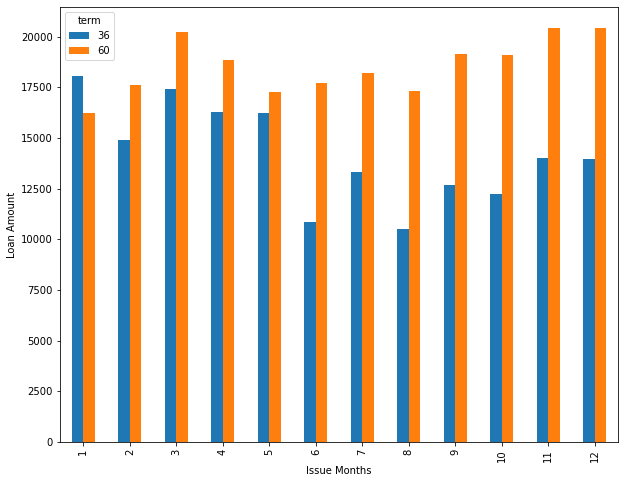

In [68]:
pd.pivot_table(data= risky_loan, columns= 'term', values='loan_amnt', index='issue_month', aggfunc= 'mean').plot(kind="bar", figsize=[10,8])
plt.xlabel('Issue Months')
plt.ylabel('Loan Amount')
plt.show()


Insight: The demand for 36-Month Term loans seems to decrease in the second and third quarter of the year.

Recommendation: Lending Club can prioritize more in availing funds for 36-month term loans in first and last quarter of the year;  and focus  gathering funds for 60-month term loans in second and third quarter of the year.


So the top 6 important driver variables we can strongly suggest:

1) Annual Income – As different mid range income earner are most defaulting especially those who pay rent or mortgage for residence.
2) Address State – As a particular state (e.g: Nebraska in our case) can show high rate of defaulting.

3) Interest Rate – As population with Charged-Off loan status has been experiencing rising interest rate every year.

4) Loan Terms- As demand for the 2 different loan terms vary across different quarters of the year. 

5) Purpose – As particular category (e.g: small business in our case) may have significantly high rate of defaulting.

6) Loan Sub Grade – As particular loan sub grades tend to default significantly higher.


**** THANK YOU ****